In [177]:
# 공공 데이터 포털 요청 관련
import requests
import xml.etree.ElementTree as et
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote


import pandas as pd
import numpy as np
import time
import pprint
from os import name
# 시각화
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from matplotlib import rcParams
from matplotlib import font_manager, rc
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
from tqdm import tqdm
###한글 폰트###
from matplotlib import rcParams
from matplotlib import font_manager, rc

rcParams['axes.unicode_minus'] = False
#plt.rcParams['font.family'] = 'Malgun Gothic'

font_name = font_manager.FontProperties(fname="/Users/gominseong/Library/Fonts/MaruBuri-Regular.otf").get_name()
rc('font', family=font_name)

  2%|▋                                           | 1/60 [00:02<02:06,  2.14s/it]

(75, 12)


  3%|█▍                                          | 2/60 [00:04<01:56,  2.02s/it]

(108, 12)


  5%|██▏                                         | 3/60 [00:05<01:52,  1.97s/it]

(176, 12)


  7%|██▉                                         | 4/60 [00:07<01:50,  1.97s/it]

(235, 12)


  8%|███▋                                        | 5/60 [00:10<01:52,  2.04s/it]

(321, 12)


 10%|████▍                                       | 6/60 [00:12<01:51,  2.06s/it]

(428, 12)


 12%|█████▏                                      | 7/60 [00:14<01:49,  2.06s/it]

(525, 12)


 13%|█████▊                                      | 8/60 [00:16<01:47,  2.07s/it]

(592, 12)


 15%|██████▌                                     | 9/60 [00:18<01:43,  2.04s/it]

(636, 12)


 17%|███████▏                                   | 10/60 [00:20<01:40,  2.01s/it]

(694, 12)


 18%|███████▉                                   | 11/60 [00:22<01:37,  1.99s/it]

(807, 12)


 20%|████████▌                                  | 12/60 [00:24<01:34,  1.97s/it]

(882, 12)


 22%|█████████▎                                 | 13/60 [00:26<01:31,  1.95s/it]

(936, 12)


 23%|██████████                                 | 14/60 [00:27<01:28,  1.93s/it]

(987, 12)


 25%|██████████▊                                | 15/60 [00:29<01:26,  1.93s/it]

(1052, 12)


 27%|███████████▍                               | 16/60 [00:31<01:25,  1.95s/it]

(1143, 12)


 28%|████████████▏                              | 17/60 [00:33<01:23,  1.94s/it]

(1216, 12)


 30%|████████████▉                              | 18/60 [00:35<01:21,  1.95s/it]

(1311, 12)


 32%|█████████████▌                             | 19/60 [00:37<01:19,  1.94s/it]

(1384, 12)


 33%|██████████████▎                            | 20/60 [00:39<01:20,  2.02s/it]

(1447, 12)


 35%|███████████████                            | 21/60 [00:41<01:18,  2.01s/it]

(1500, 12)


 37%|███████████████▊                           | 22/60 [00:43<01:15,  1.98s/it]

(1566, 12)


 38%|████████████████▍                          | 23/60 [00:45<01:11,  1.93s/it]

(1647, 12)


 40%|█████████████████▏                         | 24/60 [00:47<01:07,  1.88s/it]

(1712, 12)


 42%|█████████████████▉                         | 25/60 [00:49<01:04,  1.84s/it]

(1770, 12)


 43%|██████████████████▋                        | 26/60 [00:50<01:02,  1.83s/it]

(1852, 12)


 45%|███████████████████▎                       | 27/60 [00:52<00:59,  1.81s/it]

(1912, 12)


 47%|████████████████████                       | 28/60 [00:54<00:57,  1.79s/it]

(1960, 12)


 48%|████████████████████▊                      | 29/60 [00:56<00:55,  1.78s/it]

(2038, 12)


 50%|█████████████████████▌                     | 30/60 [00:57<00:53,  1.77s/it]

(2108, 12)


 52%|██████████████████████▏                    | 31/60 [00:59<00:51,  1.76s/it]

(2156, 12)


 53%|██████████████████████▉                    | 32/60 [01:01<00:49,  1.77s/it]

(2214, 12)


 55%|███████████████████████▋                   | 33/60 [01:03<00:47,  1.76s/it]

(2265, 12)


 57%|████████████████████████▎                  | 34/60 [01:05<00:46,  1.78s/it]

(2326, 12)


 58%|█████████████████████████                  | 35/60 [01:06<00:44,  1.78s/it]

(2389, 12)


 60%|█████████████████████████▊                 | 36/60 [01:08<00:42,  1.79s/it]

(2463, 12)


 62%|██████████████████████████▌                | 37/60 [01:10<00:42,  1.85s/it]

(2522, 12)


 63%|███████████████████████████▏               | 38/60 [01:12<00:41,  1.87s/it]

(2573, 12)


 65%|███████████████████████████▉               | 39/60 [01:14<00:38,  1.85s/it]

(2648, 12)


 67%|████████████████████████████▋              | 40/60 [01:16<00:36,  1.83s/it]

(2732, 12)


 68%|█████████████████████████████▍             | 41/60 [01:17<00:34,  1.83s/it]

(2807, 12)


 70%|██████████████████████████████             | 42/60 [01:19<00:32,  1.82s/it]

(2899, 12)


 72%|██████████████████████████████▊            | 43/60 [01:21<00:30,  1.81s/it]

(2953, 12)


 73%|███████████████████████████████▌           | 44/60 [01:23<00:28,  1.81s/it]

(3016, 12)


 75%|████████████████████████████████▎          | 45/60 [01:25<00:27,  1.86s/it]

(3065, 12)


 77%|████████████████████████████████▉          | 46/60 [01:27<00:26,  1.87s/it]

(3168, 12)


 78%|█████████████████████████████████▋         | 47/60 [01:29<00:24,  1.85s/it]

(3245, 12)


 80%|██████████████████████████████████▍        | 48/60 [01:30<00:21,  1.83s/it]

(3331, 12)


 82%|███████████████████████████████████        | 49/60 [01:32<00:19,  1.81s/it]

(3374, 12)


 83%|███████████████████████████████████▊       | 50/60 [01:34<00:18,  1.80s/it]

(3444, 12)


 85%|████████████████████████████████████▌      | 51/60 [01:36<00:16,  1.79s/it]

(3509, 12)


 87%|█████████████████████████████████████▎     | 52/60 [01:37<00:14,  1.80s/it]

(3573, 12)


 88%|█████████████████████████████████████▉     | 53/60 [01:39<00:12,  1.83s/it]

(3616, 12)


 90%|██████████████████████████████████████▋    | 54/60 [01:42<00:13,  2.17s/it]

(3688, 12)


 92%|███████████████████████████████████████▍   | 55/60 [01:44<00:10,  2.10s/it]

(3756, 12)


 93%|████████████████████████████████████████▏  | 56/60 [01:46<00:08,  2.02s/it]

(3783, 12)


 95%|████████████████████████████████████████▊  | 57/60 [01:48<00:05,  1.95s/it]

(3817, 12)


 97%|█████████████████████████████████████████▌ | 58/60 [01:50<00:03,  1.90s/it]

(3873, 12)


 98%|██████████████████████████████████████████▎| 59/60 [01:51<00:01,  1.86s/it]

(3959, 12)


100%|███████████████████████████████████████████| 60/60 [01:53<00:00,  1.90s/it]

(4030, 12)


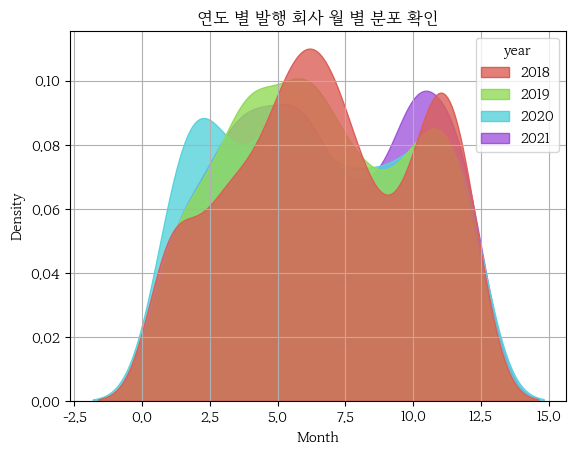

In [178]:
encoding = ''
decoding = ''
url = 'http://api.seibro.or.kr/openapi/service/StockSvc/getNewDepoSecnListN1'


date_small_lst = ['20'+str(y)+str(x) for x in range(1,13) for y in range(18,23)]
date_lst = [x[:4]+'0'+x[-1]  if len(x)==5 else x for x in date_small_lst]
date_lst.sort()

df = pd.DataFrame()
for date in tqdm(date_lst):
    params ={'serviceKey' : decoding, 
        'yyyymm': date,
        'numOfRows':999
        #'stdDt':20171130
        }
    response = requests.get(url, params=params)
    content = response.text
    #print(response.text)
    # 깔끔한 출력 위한 코드
    pp = pprint.PrettyPrinter(indent=4)
    #print(pp.pprint(content))

    #bs4 사용하여 item 태그 분리

    xml_obj = bs4.BeautifulSoup(content,'lxml-xml')
    rows = xml_obj.findAll('item')
    #print(rows)
    # 각 행의 컬럼, 이름, 값을 가지는 리스트 만들기
    row_list = [] # 행값
    name_list = [] # 열이름값
    value_list = [] #데이터값

    # xml 안의 데이터 수집
    for i in range(0, len(rows)):
        columns = rows[i].find_all()
        #첫째 행 데이터 수집
        for j in range(0,len(columns)):
            if i ==0:
                # 컬럼 이름 값 저장
                name_list.append(columns[j].name)
            # 컬럼의 각 데이터 값 저장
            value_list.append(columns[j].text)
        # 각 행의 value값 전체 저장
        row_list.append(value_list)
        # 데이터 리스트 값 초기화
        value_list=[]
        
    
    #xml값 DataFrame으로 만들기
    df1 = pd.DataFrame(row_list, columns=name_list)
    df = pd.concat([df, df1], axis=0)
    print(df.shape)
    
    
    
# pval = 액면가
# totIssuQty = 총 발행 수

df["pval"] = df["pval"].astype("int")
df["totIssuQty"] = df["totIssuQty"].astype("int")
df["총 발행 주식 금액"] = df["totIssuQty"] * df["pval"]  


df["M"] = df["apliDt"].apply(lambda x: x[:6])
Q1 = df['pval'].quantile(0.25)
Q3 = df['pval'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

median = df['pval'].median()
df['pval'] = np.where((df['pval'] < lower) , lower, df['pval'])
df['pval'] = np.where((df['pval'] > upper) , upper, df['pval'])
df["year"] = df["apliDt"].apply(lambda x: x[:4])
df["M"] = pd.to_datetime(df["M"], format = '%Y%m')
sns.color_palette("hls", 5) # hls 색상표에서 8개의 색상을 가져옴
df = df.reset_index()

df["Month"]=df["apliDt"].apply(lambda x: x[4:6])
df["Month"]= df["Month"].astype('int')
sns.kdeplot(data = df.query('year!="2022"'), x ='Month', hue='year', fill=True, common_norm=False, palette="hls",
   alpha=.8)
plt.title("연도 별 발행 회사 월 별 분포 확인")
plt.grid()
plt.show()
#-> 모든 연도에서 유사한 분포를 보임, 발행을 많이 하는 기간이 존재(봄)  (다만, 2020년에는 분포가 약간 다름 : 코로나)

In [ ]:
encoding = ''
decoding = ''
url = 'http://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo'

df = pd.DataFrame()
for stock in tqdm(newstock20_21):
    params ={'serviceKey' : decoding, 
            'likeSrtnCd': stock,
            'numOfRows':9999,
             'pageNo':1,
             'resultType': "xml",
             'beginBasDt':20180101

        #'stdDt':20171130
        }
    response = requests.get(url, params=params)
    content = response.text
    #print(response.text)
    # 깔끔한 출력 위한 코드
    pp = pprint.PrettyPrinter(indent=4)
    #print(pp.pprint(content))

    #bs4 사용하여 item 태그 분리

    xml_obj = bs4.BeautifulSoup(content,'lxml-xml')
    rows = xml_obj.findAll('item')
    #print(rows)
    # 각 행의 컬럼, 이름, 값을 가지는 리스트 만들기
    row_list = [] # 행값
    name_list = [] # 열이름값
    value_list = [] #데이터값

    # xml 안의 데이터 수집
    for i in range(0, len(rows)):
        columns = rows[i].find_all()
        #첫째 행 데이터 수집
        for j in range(0,len(columns)):
            if i ==0:
                # 컬럼 이름 값 저장
                name_list.append(columns[j].name)
            # 컬럼의 각 데이터 값 저장
            value_list.append(columns[j].text)
        # 각 행의 value값 전체 저장
        row_list.append(value_list)
        # 데이터 리스트 값 초기화
        value_list=[]
        
    
    #xml값 DataFrame으로 만들기
    df1 = pd.DataFrame(row_list, columns=name_list)
    df = pd.concat([df, df1], axis=0)
    print(df.shape)
df.to_csv("..data/KRX_NewStock_2020~2021.csv", index=False)

In [4]:
df = pd.read_csv("..data/KRX_NewStock_2020~2021.csv")
newstock20_21 = list(df["srtnCd"].unique())

df.columns

Index(['basDt', 'srtnCd', 'isinCd', 'itmsNm', 'mrktCtg', 'clpr', 'vs', 'fltRt',
       'mkp', 'hipr', 'lopr', 'trqu', 'trPrc', 'lstgStCnt', 'mrktTotAmt'],
      dtype='object')

#### newstock20_21 : 2020년~2021년 KRX신규상장 종목번호 리스트
#### df : 위에 해당하는 기업의 주가 정보 데이터 프레임
|| df columns 설명 || 
- basDt 기준일자
- srtnCd 종목코드
- isinCd 국제채권번호
- itmsNm 종목명
- mrktCtg 상장시장
- clpr 종가
- vs 전일 대비 등락
- fltRt 전일 대비 등락률
- mkp 시가
- hipr 고가
- lowpr 저가
- trqu 거래량
- trPrc 거래 금액
- lstgStCnt 상장 주식 수
- mrktTotAmt 시총

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105410 entries, 0 to 105409
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   basDt       105410 non-null  int64  
 1   srtnCd      105410 non-null  int64  
 2   isinCd      105410 non-null  object 
 3   itmsNm      105410 non-null  object 
 4   mrktCtg     105410 non-null  object 
 5   clpr        105410 non-null  int64  
 6   vs          105410 non-null  int64  
 7   fltRt       105410 non-null  float64
 8   mkp         105410 non-null  int64  
 9   hipr        105410 non-null  int64  
 10  lopr        105410 non-null  int64  
 11  trqu        105410 non-null  int64  
 12  trPrc       105410 non-null  int64  
 13  lstgStCnt   105410 non-null  int64  
 14  mrktTotAmt  105410 non-null  int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 12.1+ MB


In [6]:
df.head()

,basDt,srtnCd,isinCd,itmsNm,mrktCtg,clpr,vs,fltRt,mkp,hipr,lopr,trqu,trPrc,lstgStCnt,mrktTotAmt
0,20230327,400560,KR7400560009,하나금융20호스팩,KOSDAQ,2280,0,0.0,0,0,0,0,0,3050000,6954000000
1,20230324,400560,KR7400560009,하나금융20호스팩,KOSDAQ,2280,0,0.0,0,0,0,0,0,3050000,6954000000
2,20230323,400560,KR7400560009,하나금융20호스팩,KOSDAQ,2280,0,0.0,0,0,0,0,0,3050000,6954000000
3,20230322,400560,KR7400560009,하나금융20호스팩,KOSDAQ,2280,0,0.0,0,0,0,0,0,3050000,6954000000
4,20230321,400560,KR7400560009,하나금융20호스팩,KOSDAQ,2280,0,0.0,0,0,0,0,0,3050000,6954000000


In [7]:
trading_day = sorted(list(df["basDt"].unique()))

In [8]:
df['basDt'] = df['basDt'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [10]:
# 2020년부터 krx에 상장한 기업의 수
df["itmsNm"].nunique()

224

In [19]:
df['itmsNm'] = df['itmsNm'].apply(lambda x: str(x))

In [35]:
# 2020년부터 krx에 상장한 기업의 수, 스팩은 제외하고 분석 진행
spac_index = df.query("itmsNm.str.contains('스팩')").index
df = df.iloc[list(set(df.index) - set(spac_index))]

In [36]:
# 300거래일 이상이 존재하는 주식 리스트
over300 = df.groupby("itmsNm")["isinCd"].count().reset_index().query("isinCd >= 300")["itmsNm"].unique()

In [43]:
# 주식 별 300거래일 dataframe을 생성
df_lst = []
for name in tqdm(over300):
    df_lst.append(df.query("itmsNm == @name").sort_values(by="basDt").iloc[:300])

100%|████████████████████████████████████████| 161/161 [00:00<00:00, 471.03it/s]


In [47]:
df_lst[0].tail()

,basDt,srtnCd,isinCd,itmsNm,mrktCtg,clpr,vs,fltRt,mkp,hipr,lopr,trqu,trPrc,lstgStCnt,mrktTotAmt
90564,2022-09-30,297890,KR7297890006,HB솔루션,KOSDAQ,13350,-350,-2.55,13350,13800,13050,64962,868051850,16720093,223213241550
90563,2022-10-04,297890,KR7297890006,HB솔루션,KOSDAQ,14200,850,6.37,13600,14350,13600,49590,688866550,16720093,237425320600
90562,2022-10-05,297890,KR7297890006,HB솔루션,KOSDAQ,14000,-200,-1.41,14300,14900,13800,76574,1082802300,16720093,234081302000
90561,2022-10-06,297890,KR7297890006,HB솔루션,KOSDAQ,14600,600,4.29,14200,14800,14050,67089,969734600,16720093,244113357800
90560,2022-10-07,297890,KR7297890006,HB솔루션,KOSDAQ,14300,-300,-2.05,14350,14500,14100,52315,743568850,16720093,239097329900


In [51]:
for df in df_lst:
    df["log_fltRt"] = df["fltRt"].apply(lambda x: np.log(x+1))

In [54]:
np.log(2560)-np.log(2900)

-0.12470347850095731

In [63]:
# 종목별 로그 수익률 계산
for df in df_lst:
    lst=[0]
    for i in range(299):
        lst.append(np.log(df.iloc[i+1,5])-np.log(df.iloc[i,5]))
    df["log_fltRt"]=lst

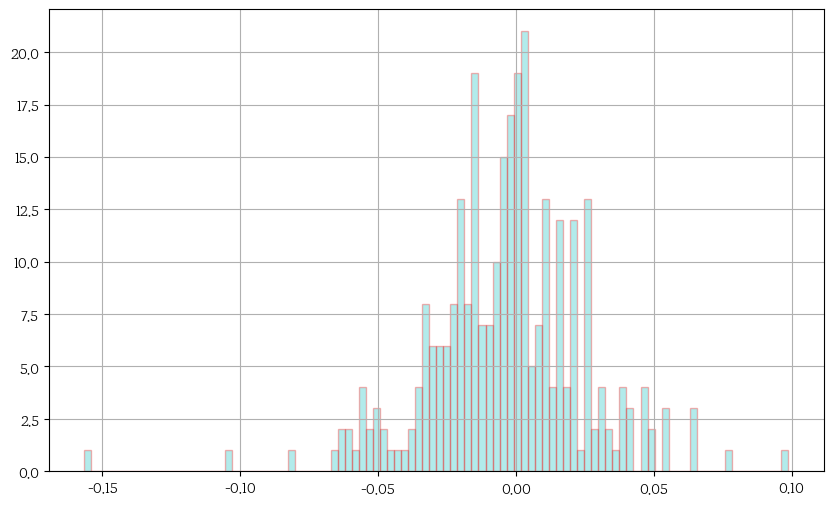

In [68]:
# 특정 종목 로그 수익률 히스토 그램.
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df_lst[-1]["log_fltRt"], alpha=0.3, color = 'c', ec = 'red', bins=100) 
ax.grid(True)
plt.savefig("retrun_histogram01.png", dpi=150, bbox_inches='tight')
plt.show()

In [77]:
print(len(df_lst))
#총 161개의 신규 상장 주식 중 상장 후 300일 거래일이 지나고 나서 주가가 오른 비율 구하기

log_sum={}
for df,name in zip(df_lst, over300):
    log_sum[name] = (np.exp(df["log_fltRt"].sum())-1)*100

161


In [104]:
# 한 개의 신규 상장 주식을 300일간 가지고 있었을 때 오를 확률
plus, minus = 0, 0
for a in log_sum.values():
    if a > 0: plus+=1
    else: minus+=1
print(plus/(plus+minus))

0.14906832298136646


In [105]:
import math
p_rate = plus/(plus+minus)

a = math.factorial(10)
b = math.factorial(7) *math.factorial(3)
c = ((p_rate)**7) * ((1-p_rate) **3)
number = a/b

prob = number * c
print("10개 중 7개가 오를 확률 : ", prob)

10개 중 7개가 오를 확률 :  0.00012093802699810594


In [113]:
var=np.sqrt(p_rate * (1-p_rate)) * np.sqrt(161)

In [114]:
p_rate*161
# 신규 상장 주식 161개 중 24개 주변으로 약 4.5개 전후로 오른다.

24.0

In [118]:
var/161*100
# 신규 상장 주식을 사서 300일간의 거래일 동안 보유했을 때 
# 오를 확률은 약15% 주변으로 약 3% 전후로 오른다.

2.8069009685966235

In [124]:
np.random.choice(over300, size=50)

array(['원티드랩', '비트나인', '맥스트', '아주스틸', '피엔케이피부임상연구센타', '차백신연구소',
       '아이패밀리에스씨', '딥노이드', '플레이디', '한국파마', '피엔케이피부임상연구센타', '와이팜', '핌스',
       '에스디바이오센서', '원방테크', '플래티어', '카카오페이', '솔루엠', '뷰노', '차백신연구소', '서남',
       '나우코스', '레인보우로보틱스', '씨엔티드림', '롯데렌탈', '맥스트', '크래프톤', '리파인', '크래프톤',
       '이노뎁', '이삭엔지니어링', '아스플로', '롯데렌탈', '라이프시맨틱스', '브레인즈컴퍼니', '이루다',
       '큐라클', '아이티아이즈', 'SK바이오팜', '신도기연', '지앤비에스엔지니어링', '에이프로', '나우코스',
       '네패스아크', '마인즈랩', '지오엘리먼트', '제노코', '비비씨', '플래티어', '나우코스'],
      dtype=object)

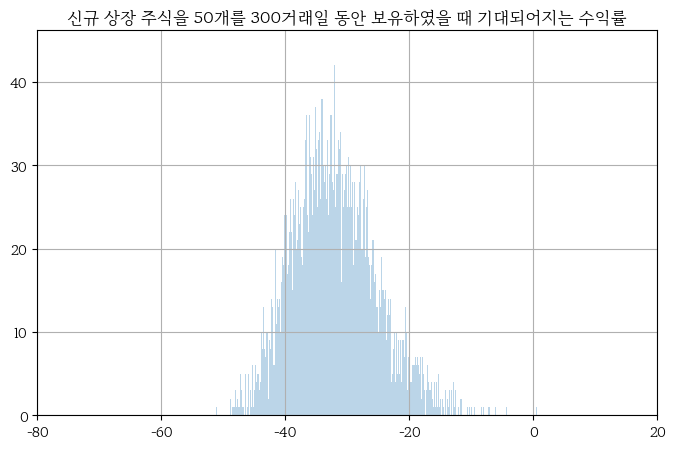

In [138]:
size = 50 # 투자 기업 수
n = 10000 # 반복실행횟수
result = []
for i in range(n):
    money = 0
    sample = np.random.choice(over300, size=50)
    for s in sample:
        money += log_sum[s]
    result.append(money/50)


fig, ax = plt.subplots(figsize=(8,5))
ax.hist(result, alpha=0.3, bins=1000) 
ax.grid(True)
ax.set_xlim((-80, 20))
plt.title("신규 상장 주식을 50개를 300거래일 동안 보유하였을 때 기대되어지는 수익률")
plt.savefig("bootstrapping01.png", dpi=150, bbox_inches='tight')
plt.show()

In [139]:
ret5 = np.percentile(result, 5)

In [140]:
VaR95= ret5*200000000

In [141]:
VaR95

-8497379026.4314375

### 데이터 수집

In [209]:
df_1=pd.read_csv("../data/공모기업현황.csv")
df_1 = df_1[df_1['확정공모가'] != '-']
df_1 = df_1[df_1['공모금액(백만원)'] != '-']
df_1 = df_1.drop_duplicates(['회사명'])
df_1 = df_1.dropna()

In [210]:
df_2 = pd.read_csv("../data/신규상장기업현황.csv").iloc[1:,:]
df_2 = df_2[df_2['공모가 (원)'] != '-']
df_2 = df_2[df_2['공모금액 (천원)'] != '-']
df_2 = df_2.dropna()
df_2 = df_2.drop_duplicates(['회사명'])
df_2.head()

,회사명,종목코드,상장일,상장유형,증권구분,업종,국적,상장주선인/,액면가 (원),공모가 (원),공모금액 (천원),주요제품,최초상장주식수 (주)
1,마이크로투나노,424980.0,2023-04-26,신규상장,주권,반도체 제조업,대한민국,한국투자증권(주),500,"15,500","15,500,000",메모리 테스트용 프로브 카드,"5,918,890"
3,삼성FN리츠,448730.0,2023-04-10,신규상장,부동산투자회사,부동산 임대 및 공급업,대한민국,"한국투자증권(주),삼성증권(주)",500,"5,000","118,900,000",대치타워 및 에스원빌딩,"77,300,000"
4,미래에셋비전스팩3호,448830.0,2023-04-07,신규상장,주권,금융 지원 서비스업,대한민국,미래에셋증권 주식회사,100,"2,000","9,000,000",기업인수목적회사(기타금융서비스),"4,920,000"
5,하나27호스팩,448370.0,2023-04-06,신규상장,주권,금융 지원 서비스업,대한민국,하나증권주식회사,100,"2,000","10,000,000",기업인수합병,"5,620,000"
6,IBKS제22호스팩,448760.0,2023-04-06,신규상장,주권,금융 지원 서비스업,대한민국,IBK투자증권(주),100,"2,000","8,000,000",기업인수 및 합병,"4,430,000"


In [211]:
df_3 = pd.read_csv("../data/영업성과추이.csv").iloc[3:]
df_3.columns=["회사명", "종목코드", "상장일", "매출액(19)", "매출액(20)", "매출액(21)", "매출액(22)", "매출액(23)", "영업이익(19)", "영업이익(20)", "영업이익(21)", "영업이익(22)", "영업이익(23)", "당기순이익(19)", "당기순이익(20)", "당기순이익(21)", "당기순이익(22)", "당기순이익(23)"]
df_3 = df_3.dropna()
df_3 = df_3.reset_index(drop=True)
df_3["회사명"]=df_3["회사명"].astype("str")
df_3 = df_3.drop_duplicates(['회사명'])
df_3.head()

,회사명,종목코드,상장일,매출액(19),매출액(20),매출액(21),매출액(22),매출액(23),영업이익(19),영업이익(20),영업이익(21),영업이익(22),영업이익(23),당기순이익(19),당기순이익(20),당기순이익(21),당기순이익(22),당기순이익(23)
0,슈어소프트테크,298830,2023-04-28,"27,125,159","29,535,088","33,202,566",0,0,"5,378,116","5,114,182","7,049,934",0,0,"5,402,236","3,761,248","6,875,028",0,0
1,토마토시스템,393210,2023-04-27,"18,216,708","18,915,589","22,856,124","27,089,927",0,"1,175,324","649,521","1,493,135","7,457,456",0,"3,638,073","-925,322","1,285,576","4,576,291",0
2,마이크로투나노,424980,2023-04-26,"23,065,344","23,895,965","31,706,907",0,0,"1,023,978","1,209,433","4,892,916",0,0,"365,111","1,664,260","4,208,390",0,0
3,셀바이오휴먼텍,318160,2023-04-20,"23,511,181",0,0,0,0,"5,039,800",0,0,0,0,"4,483,685",0,0,0,0
4,노보믹스,283100,2023-04-19,"5,208",0,0,0,0,"-4,685,462",0,0,0,0,"-6,546,335",0,0,0,0


In [212]:
df_4 = pd.read_csv("../data/일반재무현황.csv").iloc[3:]
df_4.columns=["회사명", "종목코드", "상장일", "결산년도", "결산월", "업종", "자산", "부채", "자본", "매출액", "매출액증감률", "영업이익", "영업이익증감률", "당기순이익", "당기순이익증감률"]
df_4 = df_4.dropna()
df_4 = df_4.reset_index(drop=True)
df_4["회사명"]=df_4["회사명"].astype("str")
df_4 = df_4.drop_duplicates(['회사명'])
df_4.head()

,회사명,종목코드,상장일,결산년도,결산월,업종,자산,부채,자본,매출액,매출액증감률,영업이익,영업이익증감률,당기순이익,당기순이익증감률
0,슈어소프트테크,298830,2023-04-28,2021,12월,소프트웨어 개발 및 공급업,"72,559,095","27,770,455","44,788,639","33,202,566",12,"7,049,934",37,"6,875,028",82
1,토마토시스템,393210,2023-04-27,2022,12월,소프트웨어 개발 및 공급업,"17,321,124","4,591,676","12,729,448","27,089,927",18,"7,457,456",399,"4,576,291",256
2,마이크로투나노,424980,2023-04-26,2021,12월,반도체 제조업,"45,199,526","25,269,528","19,929,997","31,706,907",32,"4,892,916",304,"4,208,390",152
3,셀바이오휴먼텍,318160,2023-04-20,-,-,기타 섬유제품 제조업,0,0,0,0,0,0,0,0,0
4,SK오션플랜트,100090,2023-04-19,2022,12월,1차 철강 제조업,"1,190,066,054","668,375,804","521,690,250","654,274,379",44,"51,600,144",45,"24,926,400",150


In [213]:
df_5 = pd.read_csv("../data/종목별공모가대비주가등락률현황.csv").iloc[1:,:-2]
df_5.columns=["회사명", "주관사", "상장일", "공모가", "수정공모가", "상장일시가", "공모가등락률", "상장일종가", "상장일등락률", "1개월주가", "1개월등락률", "3개월주가", "3개월등락률", "6개월주가", "6개월등락률", "1년주가", "1년등락률"]
df_5 = df_5.dropna()
df_5 = df_5.reset_index(drop=True)
df_5["회사명"]=df_5["회사명"].astype("str")
df_5 = df_5.drop_duplicates(['회사명'])
df_5.head()

,회사명,주관사,상장일,공모가,수정공모가,상장일시가,공모가등락률,상장일종가,상장일등락률,1개월주가,1개월등락률,3개월주가,3개월등락률,6개월주가,6개월등락률,1년주가,1년등락률
0,토마토시스템,교보증권㈜,2023-04-27,"18,200","18,200","18,100",-0.5,"14,650",-19.5,0,0,0,0,0,0,0,0
1,마이크로투나노,한국투자증권㈜,2023-04-26,"15,500","15,500","25,200",62.6,"20,650",33.2,0,0,0,0,0,0,0,0
2,SK오션플랜트,"한국투자증권㈜,삼성증권㈜",2023-04-19,0,0,"22,000",0,"21,800",0,0,0,0,0,0,0,0,0
3,미래에셋비전스팩3호,미래에셋증권 주식회사,2023-04-07,"2,000","2,000","2,005",0.3,"2,005",0.3,0,0,0,0,0,0,0,0
4,IBKS제22호스팩,IBK투자증권㈜,2023-04-06,"2,000","2,000","2,055",2.8,"2,090",4.5,0,0,0,0,0,0,0,0


In [214]:
df = pd.merge(df_1, df_5, on=["회사명"], how="left").merge(df_2,on=["회사명","상장일"],how="left").merge(df_3,on=["회사명","상장일"],how="left").merge(df_4,on=["회사명","상장일"],how="left")

In [215]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['시장구분', '회사명', '신고서제출일', '수요예측일정', '청약일정', '납입일', '확정공모가', '공모금액(백만원)',
       '상장예정일', '상장주선인/_x', '주관사', '상장일', '공모가', '수정공모가', '상장일시가', '공모가등락률',
       '상장일종가', '상장일등락률', '1개월주가', '1개월등락률', '3개월주가', '3개월등락률', '6개월주가',
       '6개월등락률', '1년주가', '1년등락률', '종목코드_x', '상장유형', '증권구분', '업종_x', '국적',
       '상장주선인/_y', '액면가 (원)', '공모가 (원)', '공모금액 (천원)', '주요제품', '최초상장주식수 (주)',
       '종목코드_y', '매출액(19)', '매출액(20)', '매출액(21)', '매출액(22)', '매출액(23)',
       '영업이익(19)', '영업이익(20)', '영업이익(21)', '영업이익(22)', '영업이익(23)', '당기순이익(19)',
       '당기순이익(20)', '당기순이익(21)', '당기순이익(22)', '당기순이익(23)', '종목코드', '결산년도',
       '결산월', '업종_y', '자산', '부채', '자본', '매출액', '매출액증감률', '영업이익', '영업이익증감률',
       '당기순이익', '당기순이익증감률'],
      dtype='object')>

In [216]:
df = df[['시장구분', '회사명', '종목코드', '신고서제출일', '수요예측일정', '청약일정', '납입일', '공모금액(백만원)',
       '상장예정일', '상장일', '주관사', '액면가 (원)', '공모가 (원)', '주요제품', '최초상장주식수 (주)', 
       '상장일시가', '공모가등락률', '상장일종가', '상장일등락률', '1개월주가', '1개월등락률', '3개월주가', '3개월등락률', '6개월주가', 
       '6개월등락률', '1년주가', '1년등락률', '상장유형', '증권구분', '업종_x', '국적', '매출액(19)', '매출액(20)', '매출액(21)', 
       '매출액(22)', '매출액(23)', '영업이익(19)', '영업이익(20)', '영업이익(21)', '영업이익(22)', '영업이익(23)',
       '당기순이익(19)', '당기순이익(20)', '당기순이익(21)', '당기순이익(22)', '당기순이익(23)']]

In [217]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['시장구분', '회사명', '종목코드', '신고서제출일', '수요예측일정', '청약일정', '납입일', '공모금액(백만원)',
       '상장예정일', '상장일', '주관사', '액면가 (원)', '공모가 (원)', '주요제품', '최초상장주식수 (주)',
       '상장일시가', '공모가등락률', '상장일종가', '상장일등락률', '1개월주가', '1개월등락률', '3개월주가',
       '3개월등락률', '6개월주가', '6개월등락률', '1년주가', '1년등락률', '상장유형', '증권구분', '업종_x',
       '국적', '매출액(19)', '매출액(20)', '매출액(21)', '매출액(22)', '매출액(23)', '영업이익(19)',
       '영업이익(20)', '영업이익(21)', '영업이익(22)', '영업이익(23)', '당기순이익(19)',
       '당기순이익(20)', '당기순이익(21)', '당기순이익(22)', '당기순이익(23)'],
      dtype='object')>

In [218]:
df = df.dropna()
df = df[~df['회사명'].str.contains('스팩')]
#df = df.drop('상장일_x.1', axis=1)
cols_to_convert = ["신고서제출일", "수요예측일정", "청약일정", "납입일", "상장예정일", "상장일"]  # datetime으로 변환할 열의 이름 목록

for col in cols_to_convert:
    df[col] = pd.to_datetime(df[col])

    
cols_to_convert = ["공모금액(백만원)", '액면가 (원)', '공모가 (원)', '최초상장주식수 (주)',
                   "상장일시가", "공모가등락률", "상장일종가",
                  "상장일등락률", "1개월주가", "1개월등락률", "3개월주가",
                  "3개월등락률", "6개월주가", "6개월등락률", "1년주가", "1년등락률",
                  '매출액(19)', '매출액(20)', '매출액(21)', '매출액(22)',
       '매출액(23)', '영업이익(19)', '영업이익(20)', '영업이익(21)', '영업이익(22)', '영업이익(23)',
       '당기순이익(19)', '당기순이익(20)', '당기순이익(21)', '당기순이익(22)', '당기순이익(23)']  # datetime으로 변환할 열의 이름 목록
    
    
for col in cols_to_convert:
    df[col] = df[col].apply(lambda x: str(x).replace("무액면","0"))
    df[col] = df[col].apply(lambda x: str(x).replace(",",""))
    val = df[col].astype(float)
    df = pd.concat([df.drop(col, axis=1), val], axis=1)

In [219]:
# 공모 당시 기업의 매출액, 영업이익, 당기순이익
# 
df["report_year"]=df["신고서제출일"].dt.year

df_list = np.array(df[['매출액(19)', '매출액(20)', '매출액(21)', '매출액(22)','영업이익(19)', '영업이익(20)', '영업이익(21)', '영업이익(22)',
       '당기순이익(19)', '당기순이익(20)', '당기순이익(21)', '당기순이익(22)']])

lst = df["report_year"].apply(lambda x: [3,7,11] if x==2023 else ([2, 6, 10] if x==2022 else ([1, 5, 9] if x ==2021 else [0, 4, 8])))

lst_1=[]
for a, b in zip(df_list, lst):
    lst_1.append(a[b])
    
for a, b in zip(["매출액", "영업이익", "당기순이익"],np.array(lst_1).T):
    df[a]=b

In [220]:
# 데이터 프레임 완성
# 20년 4월 ~ 23년 3월
df = df.drop(['매출액(19)', '매출액(20)', '매출액(21)', '매출액(22)', '매출액(23)','영업이익(19)', '영업이익(20)', '영업이익(21)', '영업이익(22)', '영업이익(23)',
       '당기순이익(19)', '당기순이익(20)', '당기순이익(21)', '당기순이익(22)', '당기순이익(23)'], axis=1)
df = df.reset_index(drop=True)
df.to_csv("../data/project.csv", index=False)

In [221]:
gradient_1 = pd.read_csv("../data/10년만기 미국채 선물 과거 데이터.csv")
gradient_2 = pd.read_csv("../data/BTC_USD 비트파이넥스 과거 데이터.csv")
gradient_3 = pd.read_csv("../data/CBOE Volatility Index Historical Data.csv")
gradient_4 = pd.read_csv("../data/USD_KRW 과거 데이터.csv")
gradient_5 = pd.read_csv("../data/WTI유 선물 과거 데이터.csv")
gradient_6 = pd.read_csv("../data/금 선물 과거 데이터.csv")
gradient_7 = pd.read_csv("../data/천연가스 선물 과거 데이터.csv")
gradient_8 = pd.read_csv("../data/나스닥종합지수 과거 데이터.csv")
gradient_9 = pd.read_csv("../data/코스피지수 과거 데이터.csv")
df = pd.read_csv("../data/project.csv")

In [222]:
from datetime import datetime, timedelta
gradient_3.columns=["날짜", "종가", "시가", "고가", "저가", "거래량", "변동 %"]
df_lst = [gradient_1, gradient_2, gradient_3, gradient_4,
         gradient_5, gradient_6, gradient_7, gradient_8, gradient_9]
name_lst = ["미국채권10년", "비트코인", "VIX", "환율", "유가",
           "금", "천연가스", "나스닥지수", "코스피지수"]
sub_df=pd.DataFrame()
for i,(df_, nm) in tqdm(enumerate(zip(df_lst, name_lst))):
    print(nm, " start", end="\t")
    df_["종가"] = df_['종가'].apply(lambda x: str(x).replace(",",""))
    df_['종가'] = df_['종가'].astype(float)
    df_["상장일"] = pd.to_datetime(df_["날짜"])- timedelta(days=1)
    df_.sort_values(by="상장일", inplace=True)
    df_[nm+'5MA'] = df_['종가'].rolling(window=5).mean()
    df_[nm+'20MA'] = df_['종가'].rolling(window=20).mean()
    df_[nm+'60MA'] = df_['종가'].rolling(window=60).mean()
    df_[nm+'price'] = df_['종가']
    df_[nm+'5MA_line'] = df_[nm+'5MA'] - df_['종가']
    df_[nm+'20MA_line'] = df_[nm+'20MA'] - df_['종가']
    df_[nm+'60MA_line'] = df_[nm+'60MA'] - df_['종가']
    df_[nm+'var'] = df_['변동 %'].apply(lambda x:float(str(x).replace("%","")))
    df_[nm+'변동5MA'] = df_[nm+"var"].rolling(window=5).mean()
    df_.reset_index(drop=True, inplace=True)
    print(nm, " end")
    #print(df_.columns)
    
    if nm in ["나스닥지수","코스피지수"]:
        df_[nm+"거래량"] = df_["거래량"].apply(lambda x: float(x[:-1])*100 if x[-1]=="M" else float(x[:-1])*100000 if x[-1]=="B" else float(x[:-1])*1000)
        sub = df_[["상장일", nm+'price', nm+'var', nm+'5MA', nm+'20MA', nm+'60MA', 
                   nm+'5MA_line', nm+'20MA_line', nm+'60MA_line', nm+"거래량", nm+'변동5MA']]
    else:
        sub = df_[["상장일", nm+'price', nm+'var', nm+'5MA', nm+'20MA', nm+'60MA',
                  nm+'5MA_line', nm+'20MA_line', nm+'60MA_line', nm+'변동5MA']]
    
    if i==0:
        sub_df=sub
    else:
        sub_df = sub_df.merge(sub, on="상장일", how="left")
sub_df.dropna(inplace=True)

9it [00:00, 41.62it/s]

미국채권10년  start	미국채권10년  end
비트코인  start	비트코인  end
VIX  start	VIX  end
환율  start	환율  end
유가  start	유가  end
금  start	금  end
천연가스  start	천연가스  end
나스닥지수  start	나스닥지수  end
코스피지수  start	코스피지수  end


In [223]:
cols_to_convert = ["신고서제출일", "수요예측일정", "청약일정", "납입일", "상장예정일", "상장일"]  # datetime으로 변환할 열의 이름 목록

for col in cols_to_convert:
    df[col] = pd.to_datetime(df[col])
    
df = df.merge(sub_df, on="상장일", how="left")
df.dropna(inplace=True)
df.sort_values(by="상장일", inplace=True)
df.reset_index(drop=True, inplace=True)
df.to_csv("../data/final_result.csv", index=False)
df = pd.read_csv("../data/final_result.csv")

In [224]:
# 컬럼명 변경
df.rename(columns={"상장일_x":"상장일", "업종_x":"업종"}, inplace=True)
#df.index=df["회사명"]; del df["회사명"]
# 날짜 컬럼을 피쳐로 변경
for i, a in enumerate(['신고서제출일','수요예측일정', '청약일정', '납입일', '상장예정일', '상장일']):
    df[a]=pd.to_datetime(df[a])
    df[a+"_M"] = df[a].dt.month
for a in ['신고서제출일', '납입일', '상장예정일']:
    df[a+"_diff"] = (df["상장일"]-df[a]).dt.days
for i, a in enumerate(['신고서제출일','수요예측일정', '청약일정', '납입일', '상장예정일', '상장일']):
    del df[a]
    
df["주관사_갯수"] = df["주관사"].apply(lambda x: len(x.split(","))) 
주관_lst = list(set(df["주관사"].apply(lambda x: x.split(",")).sum()))
for l in 주관_lst:
    df[l+"_isin"] = df["주관사"].apply(lambda x: l in x.split(","))
df = df.drop("주관사", axis=1)


# 문자형 변수 수치형으로 변환
df["업종"] = df["업종"].apply(lambda x: x.split(" ")[0])
for k in ["시장구분", "국적", "업종", "증권구분"]:
    # 특정 열을 더미 변수로 변환하여 데이터프레임에 추가
    dummy_cols = pd.get_dummies(df[k], prefix=k)
    df = pd.concat([df, dummy_cols], axis=1)

    # 원본 열 삭제
    df = df.drop(k, axis=1)
    
# 값의 종류가 하나인 열 확인
single_value_cols = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        single_value_cols.append(col)

# 값의 종류가 하나인 열 삭제
df = df.drop(single_value_cols, axis=1)


# object타입 주요제품을 제외하고는 전부다 숫자형 피쳐로 전환.
# 주요제품은 어떻게 변경할지 생각 중
# 종목코드는 수치형으로 표시되어있지만, 그 의미는 수치와 동일하지 않다. 하지만 그 속에 의미가
# 존재할수도 있기에 그대로 진행.
# 열 전환
df[['종목코드', '주요제품']] = df[['주요제품', '종목코드']]
df.rename(columns={"종목코드":"주요제품", "주요제품":"종목코드"}, inplace=True)

In [225]:
window_size = 3
df['상장일등락_이동평균_3'] = df['상장일등락률'].rolling(window=window_size).mean().shift(1)

window_size = 7
df['상장일등락_이동평균_7'] = df['상장일등락률'].rolling(window=window_size).mean().shift(1)
df = df.fillna(df.mean())

/var/folders/g1/fs9tz0cd3t95wvmfxpgpj6540000gn/T/ipykernel_71876/3963066462.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [226]:
# 예측해야할 부분.
label = ["회사명","주요제품",'공모가등락률','상장일종가','상장일등락률','1개월주가','1개월등락률','3개월주가',
 '3개월등락률','6개월주가','6개월등락률','1년주가','1년등락률']
label_df = df[label].copy()
for l in label:
    del df[l]
    
    
df.shape
# bool 타입 데이터 열 찾기
bool_columns = df.select_dtypes(include=bool).columns

# 선택된 열의 데이터 타입 변경
df[bool_columns] = df[bool_columns].astype(int)


df.to_csv("../data/TData_v1.csv", index=False)
label_df.to_csv("../data/LData_v1.csv", index=False)

In [227]:
df = pd.read_csv("../data/TData_v1.csv")
label_df = pd.read_csv("../data/LData_v1.csv")

In [228]:
df

,종목코드,공모금액(백만원),액면가 (원),공모가 (원),최초상장주식수 (주),상장일시가,report_year,매출액,영업이익,당기순이익,...,업종_전자부품,"업종_측정,",업종_컴퓨터,업종_통신,업종_특수,업종_플라스틱제품,증권구분_주권,증권구분_주식예탁증권,상장일등락_이동평균_3,상장일등락_이동평균_7
0,298060,30600.0,500.0,17000.0,11026646.0,29500.0,2020,168499.0,-12202218.0,-42553754.0,...,0,0,0,0,0,0,1,0,56.100932,55.785200
1,290520,20800.0,500.0,16000.0,8061280.0,16206.0,2020,83428397.0,16613876.0,14920105.0,...,0,0,0,0,1,0,1,0,56.100932,55.785200
2,950200,46200.0,0.1,11000.0,16861261.0,11650.0,2020,20086832.0,-4857527.0,-23066854.0,...,0,0,0,0,0,0,0,1,56.100932,55.785200
3,262260,29547.0,500.0,21600.0,6345954.0,21600.0,2020,67358476.0,10382613.0,7578279.0,...,0,0,0,0,0,0,1,0,63.233333,55.785200
4,304100,18750.0,500.0,25000.0,5031515.0,20033.0,2020,17138284.0,568766.0,1373712.0,...,0,0,0,0,0,0,1,0,79.000000,55.785200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,389020,20460.0,500.0,22000.0,6197730.0,44000.0,2023,16118236.0,202950.0,617353.0,...,0,0,0,0,0,0,1,0,80.833333,103.214286
142,282720,30073.0,500.0,10000.0,12119500.0,19000.0,2023,164987063.0,1411622.0,2540895.0,...,0,0,0,0,0,0,1,0,66.500000,116.657143
143,309960,23552.0,1000.0,5100.0,23217239.0,6500.0,2023,18524984.0,0.0,3860468.0,...,0,0,0,0,0,0,1,0,65.366667,102.657143
144,358570,26000.0,500.0,13000.0,22004200.0,18950.0,2023,3500000.0,-67952024.0,-79833059.0,...,0,0,0,0,0,0,1,0,73.933333,89.185714


In [229]:
# 수치형 컬럼 선택
numeric_cols = df.select_dtypes(include='number').columns

# 각 수치형 컬럼에 대한 정보 계산 및 출력
for col in numeric_cols:
    col_max = df[col].max()
    col_min = df[col].min()
    col_median = df[col].median()
    col_mean = df[col].mean()
    col_q1 = df[col].quantile(0.25)
    col_q3 = df[col].quantile(0.75)
    
    print(f"Column: {col}")
    print(f"Max: {col_max}")
    print(f"Min: {col_min}")
    print(f"Median: {col_median}")
    print(f"Mean: {col_mean}")
    print(f"Q1: {col_q1}")
    print(f"Q3: {col_q3}")
    print()
    
    
# 수치형 컬럼 선택
numeric_cols = label_df.select_dtypes(include='number').columns

# 각 수치형 컬럼에 대한 정보 계산 및 출력
for col in numeric_cols:
    col_max = label_df[col].max()
    col_min = label_df[col].min()
    col_median = label_df[col].median()
    col_mean = label_df[col].mean()
    col_q1 = label_df[col].quantile(0.25)
    col_q3 = label_df[col].quantile(0.75)
    
    print(f"Column: {col}")
    print(f"Max: {col_max}")
    print(f"Min: {col_min}")
    print(f"Median: {col_median}")
    print(f"Mean: {col_mean}")
    print(f"Q1: {col_q1}")
    print(f"Q3: {col_q3}")
    print()

Column: 종목코드
Max: 950220
Min: 9900
Median: 336870.0
Mean: 315196.0273972603
Q1: 267290.0
Q3: 376270.0

Column: 공모금액(백만원)
Max: 12750000.0
Min: 8800.0
Median: 29729.0
Mean: 205858.7876712329
Q1: 18937.5
Q3: 53006.25

Column: 액면가 (원)
Max: 5000.0
Min: 0.0
Median: 500.0
Mean: 458.90479452054797
Q1: 500.0
Q3: 500.0

Column: 공모가 (원)
Max: 498000.0
Min: 1700.0
Median: 17000.0
Mean: 26600.68493150685
Q1: 11625.0
Q3: 26375.0

Column: 최초상장주식수 (주)
Max: 234000000.0
Min: 2442140.0
Median: 9732824.5
Mean: 17733804.671232875
Q1: 6668467.75
Q3: 15104789.25

Column: 상장일시가
Max: 597000.0
Min: 2445.0
Median: 20000.0
Mean: 33341.81506849315
Q1: 13000.0
Q3: 32750.0

Column: report_year
Max: 2023
Min: 2020
Median: 2021.0
Mean: 2021.0821917808219
Q1: 2020.0
Q3: 2022.0

Column: 매출액
Max: 2075911713.0
Min: 0.0
Median: 30445248.5
Mean: 95481905.78082192
Q1: 13063715.5
Q3: 83272465.25

Column: 영업이익
Max: 471364335.0
Min: -509130000.0
Median: 3576587.5
Mean: 5643370.02739726
Q1: -1990663.5
Q3: 8920223.0

Column: 당기순이익

In [230]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# 변수들을 표준화
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


# 변수 간 상관관계 계산
correlation_matrix = df.corr().abs()

# 상관관계가 높은 변수 제거
threshold = 0.8  # 상관관계가 이 값 이상인 변수를 제거
columns_to_drop = []
n = correlation_matrix.shape[0]
for i in range(n):
    for j in range(i+1, n):
        if correlation_matrix.iloc[i, j] >= threshold:
            column_name = correlation_matrix.columns[j]
            if column_name not in columns_to_drop:
                columns_to_drop.append(column_name)

df = df.drop(columns=columns_to_drop)

In [279]:
df

,종목코드,공모금액백만원,액면가원,공모가원,최초상장주식수주,report_year,매출액,영업이익,미국채권10년var,미국채권10년5MA_line,...,업종_전기,업종_전동기,업종_전자부품,업종_측정,업종_컴퓨터,업종_통신,업종_특수,업종_플라스틱제품,상장일등락_이동평균_3,상장일등락_이동평균_7
0,-0.127687,-0.155124,0.097208,-0.199873,-0.252215,-1.252392,-0.417491,-0.283431,0.690717,-0.678268,...,-0.083045,-0.083045,-0.22441,-0.117851,-0.188311,-0.083045,-0.256307,-0.083045,1.731389e-16,-2.351754e-16
1,-0.183870,-0.163798,0.097208,-0.220692,-0.363724,-1.252392,-0.052797,0.174238,0.661479,-0.580727,...,-0.083045,-0.083045,-0.22441,-0.117851,-0.188311,-0.083045,3.901567,-0.083045,1.731389e-16,-2.351754e-16
2,4.731655,-0.141316,-1.085274,-0.324785,-0.032811,-1.252392,-0.330245,-0.166780,0.603001,-0.557503,...,-0.083045,-0.083045,-0.22441,-0.117851,-0.188311,-0.083045,-0.256307,-0.083045,1.731389e-16,-2.351754e-16
3,-0.394446,-0.156056,0.097208,-0.104107,-0.428227,-1.252392,-0.123186,0.075271,-0.069492,-0.292750,...,-0.083045,-0.083045,-0.22441,-0.117851,-0.188311,-0.083045,-0.256307,-0.083045,1.737962e-01,-2.351754e-16
4,-0.082681,-0.165613,0.097208,-0.033324,-0.477655,-1.252392,-0.343160,-0.080597,0.105941,-0.408870,...,-0.083045,-0.083045,-0.22441,-0.117851,-0.188311,-0.083045,-0.256307,-0.083045,5.579846e-01,-2.351754e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.550090,-0.164099,0.097208,-0.095780,-0.433801,2.219428,-0.347628,-0.086407,0.105941,-0.376356,...,-0.083045,-0.083045,-0.22441,-0.117851,-0.188311,-0.083045,-0.256307,-0.083045,6.026577e-01,1.569808e+00
142,-0.241991,-0.155591,0.097208,-0.345603,-0.211120,2.219428,0.304446,-0.067210,-1.853061,-2.735915,...,12.041595,-0.083045,-0.22441,-0.117851,-0.188311,-0.083045,-0.256307,-0.083045,2.533955e-01,2.014740e+00
143,-0.039016,-0.161363,1.279927,-0.447615,0.206198,2.219428,-0.337086,-0.089630,0.310613,0.599052,...,-0.083045,-0.083045,-0.22441,-0.117851,-0.188311,-0.083045,-0.256307,-0.083045,2.257794e-01,1.551368e+00
144,0.323196,-0.159196,0.097208,-0.283148,0.160583,2.219428,-0.402898,-1.168873,1.070822,-0.743296,...,-0.083045,-0.083045,-0.22441,-0.117851,-0.188311,-0.083045,-0.256307,-0.083045,4.345245e-01,1.105490e+00


In [280]:
df.columns.to_list()

['종목코드',
 '공모금액백만원',
 '액면가원',
 '공모가원',
 '최초상장주식수주',
 'report_year',
 '매출액',
 '영업이익',
 '미국채권10년var',
 '미국채권10년5MA_line',
 '미국채권10년20MA_line',
 '미국채권10년60MA_line',
 '비트코인price',
 '비트코인var',
 '비트코인5MA_line',
 '비트코인20MA_line',
 '비트코인60MA_line',
 '비트코인변동5MA',
 'VIXprice',
 'VIXvar',
 'VIX5MA_line',
 'VIX20MA_line',
 '환율var',
 '환율5MA_line',
 '환율20MA_line',
 '환율60MA_line',
 '유가price',
 '유가var',
 '유가5MA_line',
 '유가20MA_line',
 '금price',
 '금var',
 '금60MA',
 '금5MA_line',
 '금20MA_line',
 '금60MA_line',
 '금변동5MA',
 '천연가스var',
 '천연가스5MA_line',
 '천연가스20MA_line',
 '천연가스60MA_line',
 '천연가스변동5MA',
 '나스닥지수var',
 '나스닥지수5MA_line',
 '나스닥지수20MA_line',
 '나스닥지수60MA_line',
 '나스닥지수거래량',
 '코스피지수var',
 '코스피지수5MA_line',
 '코스피지수20MA_line',
 '코스피지수60MA_line',
 '코스피지수거래량',
 '코스피지수변동5MA',
 '신고서제출일_M',
 '수요예측일정_M',
 '신고서제출일_diff',
 '납입일_diff',
 '주관사_갯수',
 '삼성증권_isin',
 '현대차증권주식회사_isin',
 '골드만삭스증권서울지점_isin',
 '미래에셋증권주식회사_isin',
 '유안타증권_isin',
 'KB증권_isin',
 '신영증권_isin',
 '한화투자증권_isin',
 '키움증권_isin',
 'DB금융투자주식회사_isin',
 '

In [281]:
label_df

,회사명,주요제품,공모가등락률,상장일종가,상장일등락률,1개월주가,1개월등락률,3개월주가,3개월등락률,6개월주가,6개월등락률,1년주가,1년등락률
0,에스씨엠생명과학,세포치료제,73.5,36100.0,112.4,26000.0,52.9,31500.0,85.3,34700.0,104.1,31700.0,86.5
1,신도기연,"OLED용 후공정장비(라미네이터, 오토클레이브 등)",100.0,11344.0,40.0,10458.0,29.1,11268.0,39.1,9698.0,19.7,9166.0,13.1
2,소마젠,"유전체 분석 서비스 (NGS, CES 등)",5.9,15100.0,37.3,16950.0,54.1,15100.0,37.3,18150.0,65.0,13650.0,24.1
3,에이프로,"2차전지 장비 등(일반충방전기, 고온가압 충방전기 등)",100.0,28050.0,159.7,22225.0,105.8,19300.0,78.7,23775.0,120.1,20000.0,85.2
4,솔트룩스,인공지능 및 빅데이터 소프트웨어,60.0,17178.0,37.2,14299.0,14.2,18105.0,44.6,17529.0,40.0,15601.0,24.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,자람테크놀로지,"XGSPON, 기가와이어, 광트랜시버 등",100.0,42700.0,94.1,48300.0,119.5,0.0,0.0,0.0,0.0,0.0,0.0
142,금양그린파워,"플랜트, 발전소 및 신재생에너지 발전소 공사 및 용역",90.0,16200.0,62.0,22850.0,128.5,0.0,0.0,0.0,0.0,0.0,0.0
143,LB인베스트먼트,중소기업 창업투자,27.5,8450.0,65.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,지아이이노베이션,면역항암제 및 알레르기 치료제,45.8,20250.0,55.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [282]:
column_name = '1개월등락률'  # 제거할 행을 검사할 열의 이름
month1_df = df.drop(label_df[label_df[column_name] == 0].index)
label1_df = label_df.drop(label_df[label_df[column_name] == 0].index)

column_name = '3개월등락률'  # 제거할 행을 검사할 열의 이름
month3_df = df.drop(label_df[label_df[column_name] == 0].index)
label3_df = label_df.drop(label_df[label_df[column_name] == 0].index)

column_name = '6개월등락률'  # 제거할 행을 검사할 열의 이름
month6_df = df.drop(label_df[label_df[column_name] == 0].index)
label6_df = label_df.drop(label_df[label_df[column_name] == 0].index)

In [283]:
label6_df["6개월등락률"].apply(lambda x: 1 if x>1 else 0)

0      1
1      1
2      1
3      1
4      1
      ..
119    1
120    1
122    1
123    0
124    0
Name: 6개월등락률, Length: 120, dtype: int64

In [284]:
# Logistic Regression

target1 = label_df["상장일등락률"].apply(lambda x: 1 if x>10 else 0)
target2 = label_df["상장일등락률"].apply(lambda x: 1 if x>50 else 0)
target3 = label1_df["1개월등락률"].apply(lambda x: 1 if x>10 else 0)
target4 = label1_df["1개월등락률"].apply(lambda x: 1 if x>50 else 0)
target5 = label3_df["3개월등락률"].apply(lambda x: 1 if x>10 else 0)
target6 = label3_df["3개월등락률"].apply(lambda x: 1 if x>50 else 0)
target7 = label6_df["6개월등락률"].apply(lambda x: 1 if x>10 else 0)
target8 = label6_df["6개월등락률"].apply(lambda x: 1 if x>50 else 0)

In [285]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
accuracy_lst=[]
def LR(d, t):
    
    d, X_test, t, y_test = train_test_split(d, t, test_size=0.3, random_state=42)
    #print(X_test)
    #Sigmoid Function
    def sigmoid(scores):
        return 1 / (1 + np.exp(-scores))


    # cost funticion

    def cost_ml(features, target, weights):
        scores = np.dot(features, weights)
        ll = np.sum( target*np.log(sigmoid(scores)) + (1-target) * np.log(1 - sigmoid(scores)) )
        return ll  

    features = d
    intercept = np.ones((features.shape[0], 1))
    features = np.hstack((intercept, features))

    weights = np.zeros(features.shape[1])

    #print(features.shape[1])
    
    num_steps = 100000
    learning_rate = 0.001

    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        loss = cost_ml(features, t, weights)

        # Update weights with gradient
        output_error_signal = t - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

        #if step % 1000 == 0:
            #print(step, weights, loss)
    X_test = np.hstack((np.ones((X_test.shape[0], 1)),X_test))
    pred = sigmoid(np.dot(X_test, weights))
    len(pred)

    y_Predicted = (np.array(pred) > 0.5).astype(int)


    data = {'y_Actual':    y_test,
            'y_Predicted': y_Predicted
            }

    d = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])


    confusion_matrix = pd.crosstab(d['y_Actual'], d['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print(confusion_matrix)
    
    TP = confusion_matrix.loc[1,1]
    FP = confusion_matrix.loc[0,1]
    FN = confusion_matrix.loc[1,0]
    TN = confusion_matrix.loc[0,0]
    
    
    ACC = (TP + TN)/(TP+TN+FN+FP)
    accuracy_lst.append(ACC)
    TPR  = (TP)/(TP+FN)
    FPR  = FP/(FP+TN)
    print('accuracy ratio:', ACC)
    print('TPR: ',TPR)
    print('FPR:', FPR)
    
    
    # ROC 곡선 계산
    fpr, tpr, thresholds = roc_curve(y_test, pred)

    # AUC 계산
    auc = roc_auc_score(y_test, pred)

    # ROC 곡선 그래프 출력
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    
    print(auc)

In [286]:
df_lst = [df, df, month1_df, month1_df, month3_df, month3_df, month6_df, month6_df]
t_lst = [target1, target2, target3, target4, target5, target6, target7, target8]

/var/folders/g1/fs9tz0cd3t95wvmfxpgpj6540000gn/T/ipykernel_71876/570086200.py:19: RuntimeWarning: divide by zero encountered in log
  ll = np.sum( target*np.log(sigmoid(scores)) + (1-target) * np.log(1 - sigmoid(scores)) )


Predicted   0   1
Actual           
0           3  12
1          12  17
accuracy ratio: 0.45454545454545453
TPR:  0.5862068965517241
FPR: 0.8


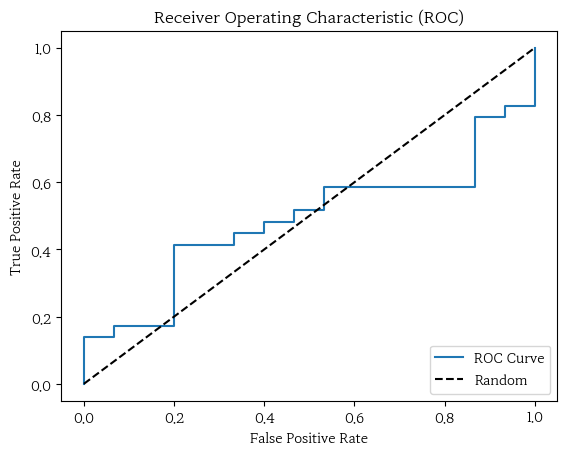

0.48735632183908045


/var/folders/g1/fs9tz0cd3t95wvmfxpgpj6540000gn/T/ipykernel_71876/570086200.py:19: RuntimeWarning: divide by zero encountered in log
  ll = np.sum( target*np.log(sigmoid(scores)) + (1-target) * np.log(1 - sigmoid(scores)) )


Predicted   0   1
Actual           
0          10  17
1          13   4
accuracy ratio: 0.3181818181818182
TPR:  0.23529411764705882
FPR: 0.6296296296296297


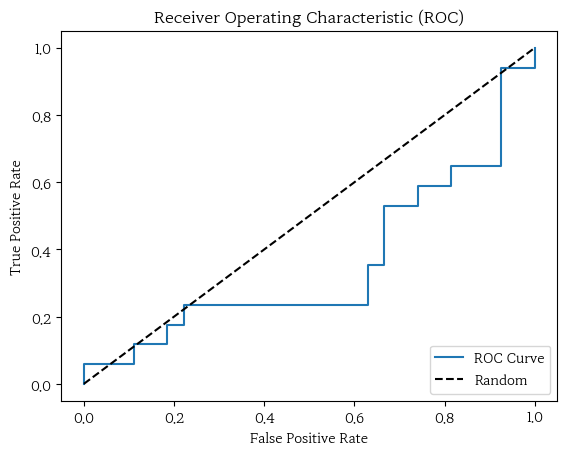

0.355119825708061


/var/folders/g1/fs9tz0cd3t95wvmfxpgpj6540000gn/T/ipykernel_71876/570086200.py:19: RuntimeWarning: divide by zero encountered in log
  ll = np.sum( target*np.log(sigmoid(scores)) + (1-target) * np.log(1 - sigmoid(scores)) )


Predicted  0   1
Actual          
0          4  16
1          6  15
accuracy ratio: 0.4634146341463415
TPR:  0.7142857142857143
FPR: 0.8


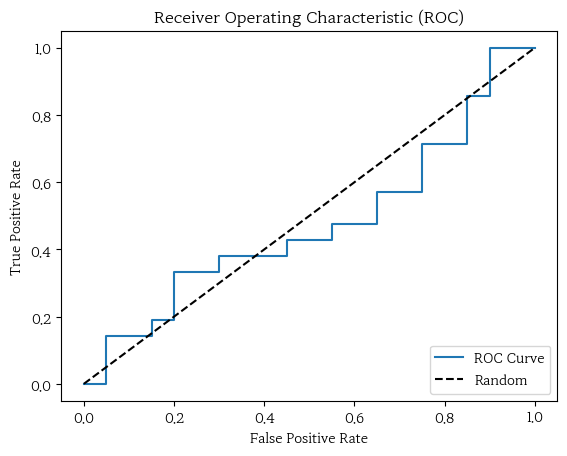

0.4761904761904761
Predicted   0   1
Actual           
0          13  15
1           7   6
accuracy ratio: 0.4634146341463415
TPR:  0.46153846153846156
FPR: 0.5357142857142857


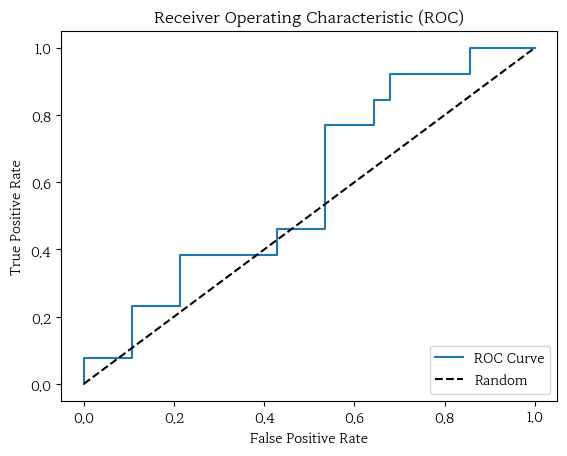

0.5851648351648352


/var/folders/g1/fs9tz0cd3t95wvmfxpgpj6540000gn/T/ipykernel_71876/570086200.py:19: RuntimeWarning: divide by zero encountered in log
  ll = np.sum( target*np.log(sigmoid(scores)) + (1-target) * np.log(1 - sigmoid(scores)) )


Predicted   0   1
Actual           
0          10   5
1          10  13
accuracy ratio: 0.6052631578947368
TPR:  0.5652173913043478
FPR: 0.3333333333333333


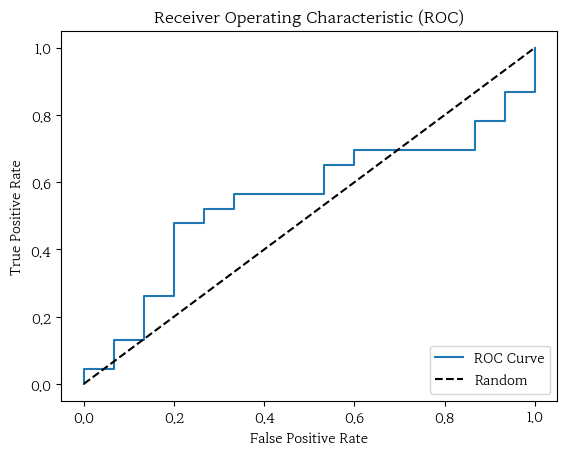

0.5478260869565217
Predicted   0   1
Actual           
0          16  10
1           8   4
accuracy ratio: 0.5263157894736842
TPR:  0.3333333333333333
FPR: 0.38461538461538464


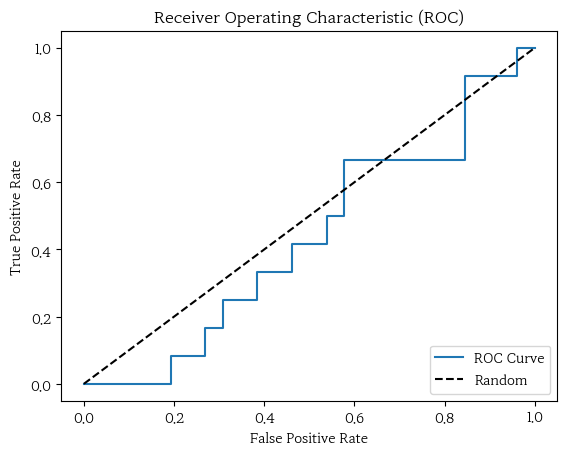

0.43269230769230765
Predicted  0   1
Actual          
0          9   7
1          8  12
accuracy ratio: 0.5833333333333334
TPR:  0.6
FPR: 0.4375


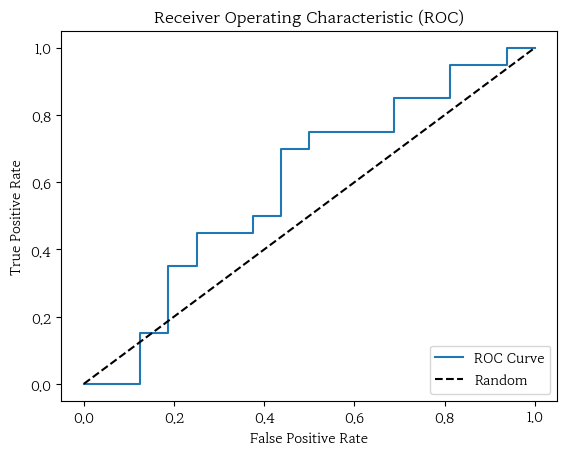

0.5906250000000001


/var/folders/g1/fs9tz0cd3t95wvmfxpgpj6540000gn/T/ipykernel_71876/570086200.py:19: RuntimeWarning: divide by zero encountered in log
  ll = np.sum( target*np.log(sigmoid(scores)) + (1-target) * np.log(1 - sigmoid(scores)) )


Predicted  0   1
Actual          
0          9  14
1          8   5
accuracy ratio: 0.3888888888888889
TPR:  0.38461538461538464
FPR: 0.6086956521739131


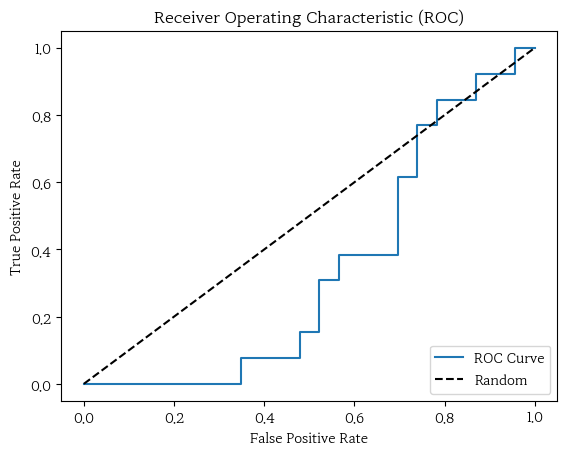

0.3377926421404682


In [287]:
for d, t in zip(df_lst, t_lst):
    LR(d, t)

In [288]:
accuracy_lst

[0.45454545454545453,
 0.3181818181818182,
 0.4634146341463415,
 0.4634146341463415,
 0.6052631578947368,
 0.5263157894736842,
 0.5833333333333334,
 0.3888888888888889]

In [472]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
accuracy_lst=[]
def LGBM(d, t):
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(d, t, test_size=0.3, random_state=42)

    # LightGBM 데이터셋 생성
    train_data = lgb.Dataset(X_train, label=y_train)
    
    # 모델 파라미터 설정
    params = {
        'metric': 'l1'
    }

    # LightGBM 모델 학습
    model = lgb.train(params, train_data, num_boost_round=100)

    # 테스트 데이터 예측
    y_pred = model.predict(X_test)

    # 예측 결과를 이진 클래스로 변환
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

    # 정확도 평가
    accuracy = accuracy_score(y_test, y_pred_binary)
    accuracy_lst.append(accuracy)
    print("Accuracy:", accuracy)
    
        # ROC 곡선 계산
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # AUC 계산
    auc = roc_auc_score(y_test, y_pred)
    print("auc score : ", auc)
    # ROC 곡선 그래프 출력
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    return model

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1894
[LightGBM] [Info] Number of data points in the train set: 102, number of used features: 62
[LightGBM] [Info] Start training from score 0.725490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

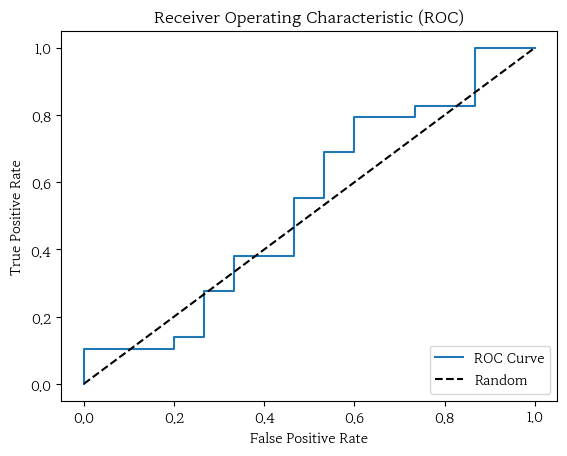

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1894
[LightGBM] [Info] Number of data points in the train set: 102, number of used features: 62
[LightGBM] [Info] Start training from score 0.421569
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

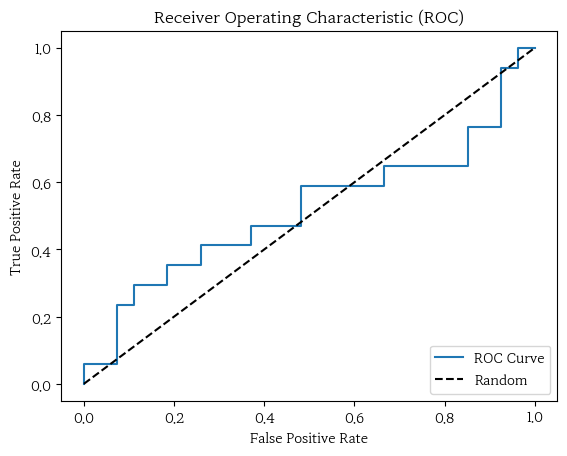

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1761
[LightGBM] [Info] Number of data points in the train set: 94, number of used features: 61
[LightGBM] [Info] Start training from score 0.691489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

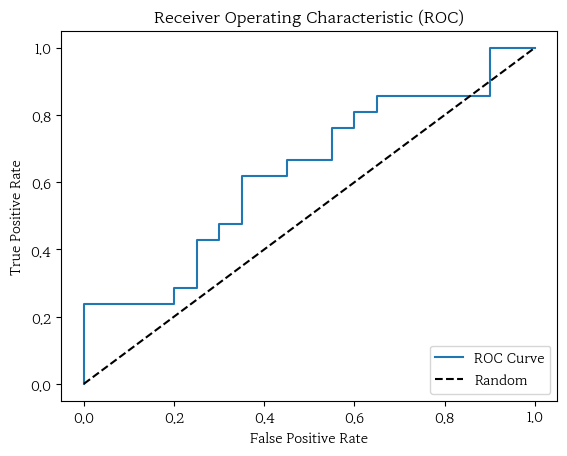

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1761
[LightGBM] [Info] Number of data points in the train set: 94, number of used features: 61
[LightGBM] [Info] Start training from score 0.489362
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

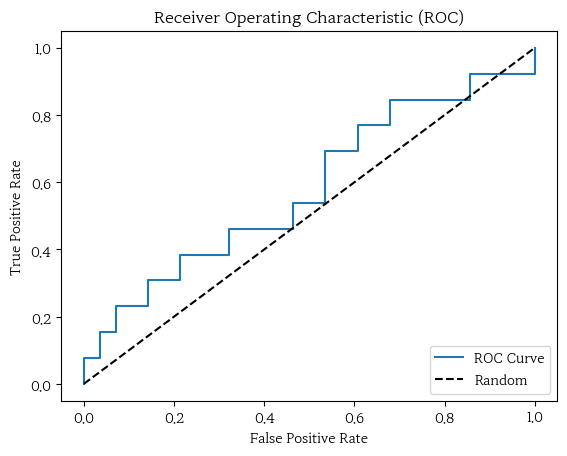

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1654
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 60
[LightGBM] [Info] Start training from score 0.602273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

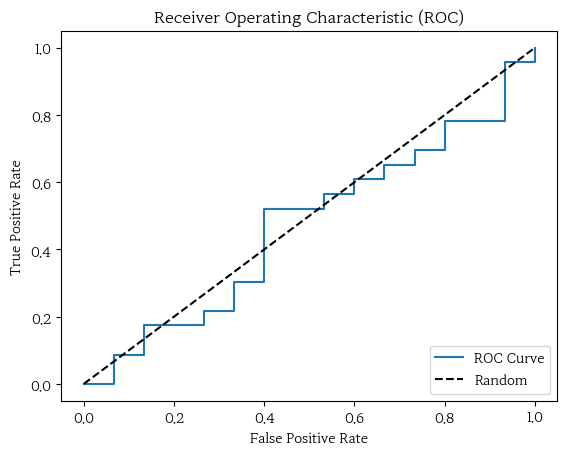

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1654
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 60
[LightGBM] [Info] Start training from score 0.352273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

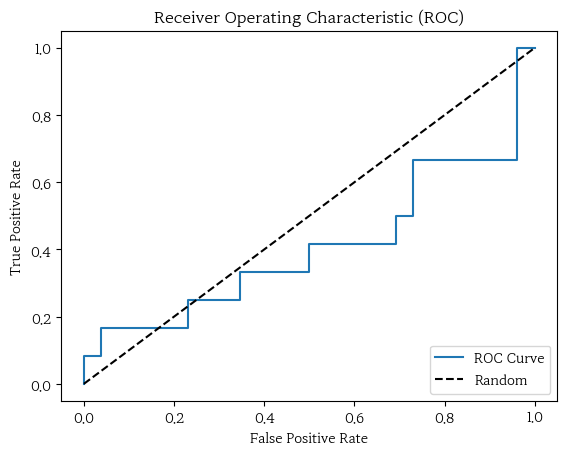

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1575
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 59
[LightGBM] [Info] Start training from score 0.630952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

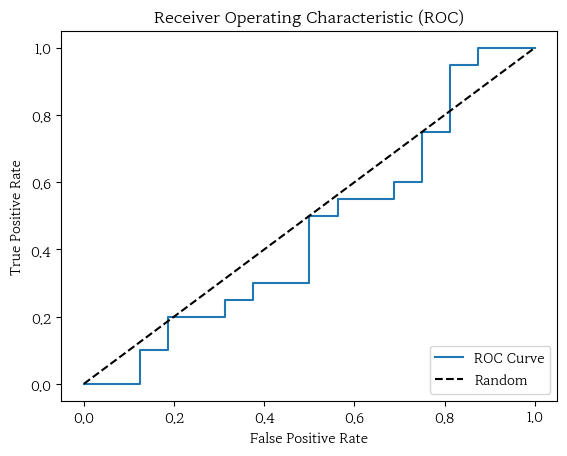

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1575
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 59
[LightGBM] [Info] Start training from score 0.357143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

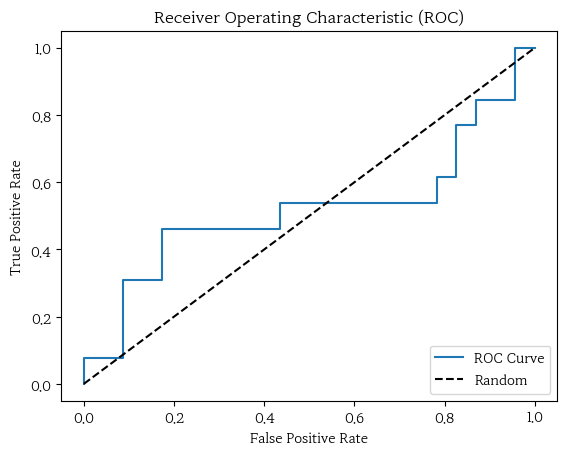

In [473]:
import re
model_list =[]
for d, t in zip(df_lst, t_lst):
    d.columns = [re.sub(r'[^A-Za-z0-9가-힣_]+', '', col) for col in d.columns]
    model_list.append(LGBM(d, t))

In [293]:
accuracy_lst

[0.6363636363636364,
 0.4772727272727273,
 0.5609756097560976,
 0.5365853658536586,
 0.5,
 0.5789473684210527,
 0.4722222222222222,
 0.6666666666666666]

In [294]:
when_m = label6_df[["상장일등락률", "1개월등락률", "3개월등락률", "6개월등락률"]]

In [295]:
# 각 행에서 가장 큰 값을 가지는 열의 인덱스 리스트 얻기
max_indices = when_m.values.argmax(axis=1)

In [296]:
from skopt import BayesSearchCV

In [483]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
accuracy_lst=[]
def LGBM(d, t):
    
# Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(d, t, test_size=0.3, random_state=42)

    # LightGBM 데이터셋 생성
    train_data = lgb.Dataset(X_train, label=y_train)

    # 하이퍼파라미터 공간 설정
    param_space = {
        'learning_rate': (0.01, 0.1, 'log-uniform'),
        'max_depth': (3, 7),
        'num_leaves': (31, 127)
    }

    # LightGBM 모델 초기화
    model = lgb.LGBMClassifier()

    # Bayesian Optimization을 사용하여 하이퍼파라미터 튜닝
    bayes_search = BayesSearchCV(model, param_space, n_iter=50, scoring='accuracy', cv=3)
    bayes_search.fit(X_train, y_train)

    # 최적의 모델 및 하이퍼파라미터 출력
    best_model = bayes_search.best_estimator_
    best_params = bayes_search.best_params_
    print("Best Model:", best_model)
    print("Best Parameters:", best_params)

    # 테스트 데이터 예측
    y_pred = best_model.predict(X_test)

    # 정확도 평가
    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    return model

In [484]:
LGBM_model2 = LGBM(month6_df, max_indices)

/opt/homebrew/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best Model: LGBMClassifier(learning_rate=0.01, max_depth=3)
Best Parameters: OrderedDict([('learning_rate', 0.01), ('max_depth', 3), ('num_leaves', 31)])
Accuracy: 0.5277777777777778


In [508]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# GPU 설정
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# 예시 데이터
data = np.array(month6_df)  # 입력 데이터 (피처)
labels = np.array(max_indices)  # 레이블 데이터

# LabelEncoder를 사용하여 레이블 인코딩
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# 데이터를 train set과 test set으로 분할
train_data, test_data, train_labels, test_labels = train_test_split(data, labels_encoded, test_size=0.3, random_state=42)

# 데이터를 Tensor로 변환
train_data = torch.Tensor(train_data).to(device)
train_labels = torch.Tensor(train_labels).long().to(device)
test_data = torch.Tensor(test_data).to(device)

# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 하이퍼파라미터 설정
input_size = len(data[0])  # 입력 피처의 크기
hidden_size = 256  # 은닉층의 크기
num_classes = 4  # 클래스의 개수
learning_rate = 0.001
num_epochs = 100

# MLP 모델 생성 및 GPU로 이동
model = MLP(input_size, hidden_size, num_classes).to(device)

# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 학습
model.train()
for epoch in range(num_epochs):
    # Forward 계산
    outputs = model(train_data)
    loss = criterion(outputs, train_labels)

    # Backward 및 경사하강법
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 매 에폭마다 정확도 출력
    if (epoch + 1) % 10 == 0:
        _, predicted = torch.max(outputs.data, 1)
        train_accuracy = accuracy_score(predicted.cpu(), torch.tensor(train_labels).cpu())
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy:.4f}')

# 평가
model.eval()
with torch.no_grad():
    outputs = model(test_data)
    _, predicted = torch.max(outputs.data, 1)
    test_accuracy = accuracy_score(predicted.cpu(), torch.tensor(test_labels).cpu())
    print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch [10/100], Loss: 0.8310, Train Accuracy: 0.6310
Epoch [20/100], Loss: 0.5270, Train Accuracy: 0.8452
Epoch [30/100], Loss: 0.3131, Train Accuracy: 0.9643
Epoch [40/100], Loss: 0.1764, Train Accuracy: 1.0000
Epoch [50/100], Loss: 0.0986, Train Accuracy: 1.0000
Epoch [60/100], Loss: 0.0583, Train Accuracy: 1.0000
Epoch [70/100], Loss: 0.0375, Train Accuracy: 1.0000
Epoch [80/100], Loss: 0.0263, Train Accuracy: 1.0000
Epoch [90/100], Loss: 0.0196, Train Accuracy: 1.0000
Epoch [100/100], Loss: 0.0154, Train Accuracy: 1.0000
Test Accuracy: 0.4722


/var/folders/g1/fs9tz0cd3t95wvmfxpgpj6540000gn/T/ipykernel_71876/2835426619.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_accuracy = accuracy_score(predicted.cpu(), torch.tensor(train_labels).cpu())
/var/folders/g1/fs9tz0cd3t95wvmfxpgpj6540000gn/T/ipykernel_71876/2835426619.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_accuracy = accuracy_score(predicted.cpu(), torch.tensor(train_labels).cpu())
/var/folders/g1/fs9tz0cd3t95wvmfxpgpj6540000gn/T/ipykernel_71876/2835426619.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTe

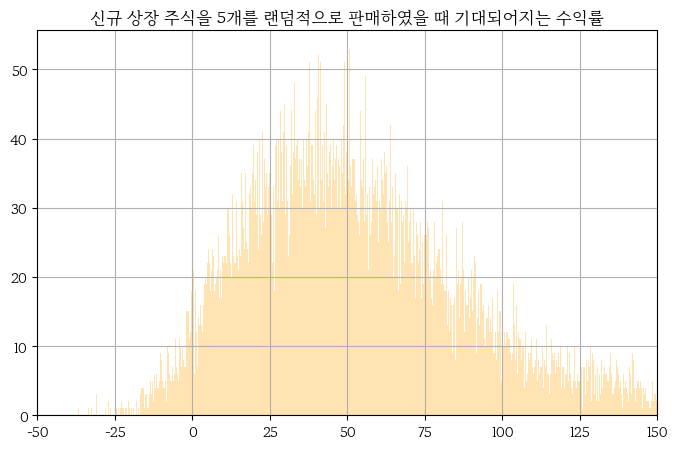

In [469]:
n = 10000 # 반복실행횟수
fake_result = []
for i in range(n):
    op = label6_df[["상장일등락률", "1개월등락률", "3개월등락률", "6개월등락률"]]
    random_rows = op.sample(n=5)
    random_array = np.random.randint(4, size=5)
    fake_result_list =[]
    for i, r in enumerate(random_array):
        fake_result_list.append(random_rows.iloc[i,r])


#     # 수익률을 로그 변환
#     log_returns = np.log(1 + np.array(fake_result_list)*0.01)

#     # 로그 수익률의 합 계산
#     total_log_return = np.sum(log_returns)

#     # 합산된 로그 수익률을 역로그 변환하여 총 수익률 계산
#     total_return = np.exp(total_log_return) - 1
    fake_result.append(np.mean(fake_result_list) )


fig, ax = plt.subplots(figsize=(8,5))
ax.hist(fake_result, alpha=0.3, bins=1000, color = "orange") 
ax.grid(True)
ax.set_xlim((-50, 150))
plt.title("신규 상장 주식을 5개를 랜덤적으로 판매하였을 때 기대되어지는 수익률")
plt.savefig("bootstrapping01.png", dpi=150, bbox_inches='tight')
plt.show()

In [470]:
np.mean(fake_result)

58.457393999999994

In [477]:
result = model_list[1].predict(month6_df)

with torch.no_grad():
    outputs = model(torch.tensor(np.array(month6_df).astype(np.float32)).to(device))
    _, result1 = torch.max(outputs.data, 1)

indices = np.where(result >= 0.5)[0]

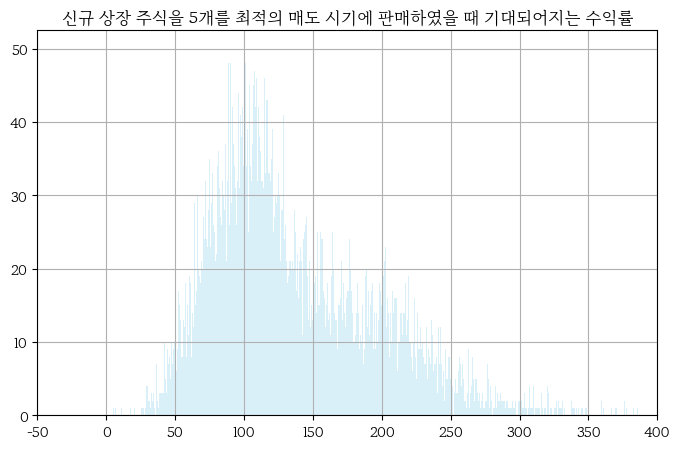

In [480]:
n = 10000 # 반복실행횟수
real_result = []
for i in range(n):
    indices2 = np.random.choice(indices, size=5, replace=False)

    result_data = label6_df.iloc[indices2][["상장일등락률", "1개월등락률", "3개월등락률", "6개월등락률"]].iloc[:,]
    result2 = np.array(result1[indices2].to("cpu"))


    result_list =[]
    for i, r in enumerate(result2):
        result_list.append(result_data.iloc[i,r])


    # 수익률을 로그 변환
    #log_returns = np.log(1 + np.array(result_list)*0.01)

    # 로그 수익률의 합 계산
    #total_log_return = np.sum(log_returns)

    # 합산된 로그 수익률을 역로그 변환하여 총 수익률 계산
    #total_return = np.exp(total_log_return) - 1
    real_result.append(np.mean(result_list))
    
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(real_result, alpha=0.3, bins=1000, color = "skyblue") 
ax.grid(True)
ax.set_xlim((-50, 400))
plt.title("신규 상장 주식을 5개를 최적의 매도 시기에 판매하였을 때 기대되어지는 수익률")
plt.savefig("bootstrapping01.png", dpi=150, bbox_inches='tight')
plt.show()

In [481]:
np.mean(real_result)

137.19171999999998

In [482]:
result_data

,상장일등락률,1개월등락률,3개월등락률,6개월등락률
7,96.1,66.7,36.1,46.7
9,18.7,54.3,26.1,23.5
91,86.8,36.4,-8.2,-21.1
61,160.0,70.8,53.7,16.3
85,114.4,142.2,52.2,26.1
